# Text Data

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

Character level representation

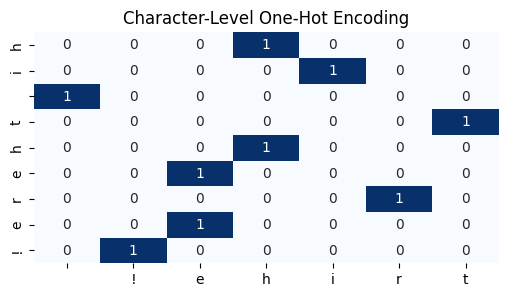

,,!,e,h,i,r,t
h,0,0,0,1,0,0,0
i,0,0,0,0,1,0,0
,1,0,0,0,0,0,0
t,0,0,0,0,0,0,1
h,0,0,0,1,0,0,0
e,0,0,1,0,0,0,0
r,0,0,0,0,0,1,0
e,0,0,1,0,0,0,0
!,0,1,0,0,0,0,0


In [42]:
text = "hi there!"
unique_chars = sorted(set(text))
one_hot = pd.DataFrame([[1 if c == ch else 0 for c in unique_chars] for ch in text],
                       columns=unique_chars, index=list(text))

plt.figure(figsize=(6, 3))
sns.heatmap(one_hot, annot=True, cbar=False, cmap="Blues")
plt.title("Character-Level One-Hot Encoding")
plt.show()

one_hot



**Analysis**

This heatmap illustrates the character-level one-hot encoding of a short text. Each character from the input string is represented as a binary vector, where only the position corresponding to that character is set to 1 and all others are 0.

- Rows correspond to characters in the input text, including spaces and punctuation.
- Columns represent the unique characters present in the text.
- A value of 1 indicates the presence of a particular character in that position.

This representation is useful in character-based natural language processing tasks, such as text generation or handwriting recognition, where fine-grained control over textual input is important.


---

Word-Level Representation

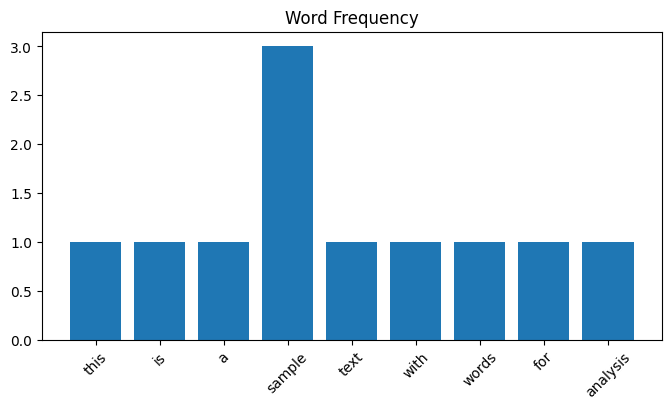

In [43]:
text = "this is a sample text with sample words for sample analysis"
words = text.split()
counts = Counter(words)

plt.figure(figsize=(8, 4))
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=45)
plt.title("Word Frequency")
plt.show()


**Analysis**

This bar chart displays the frequency of individual words in a given text. The text is tokenized by whitespace, and each unique word is counted using Python’s `Counter`.

Each bar represents a word and its frequency in the text. This type of visualization helps identify the most commonly used words, which can be useful for understanding the overall content, detecting repetition, or performing basic keyword analysis.

For example, in this case, the word "sample" appears most frequently, indicating it may be a key term in the document.


---

N-Gram Representation

['for analysis' 'is sample' 'sample text' 'sample words' 'text with'
 'this is' 'with sample' 'words for']


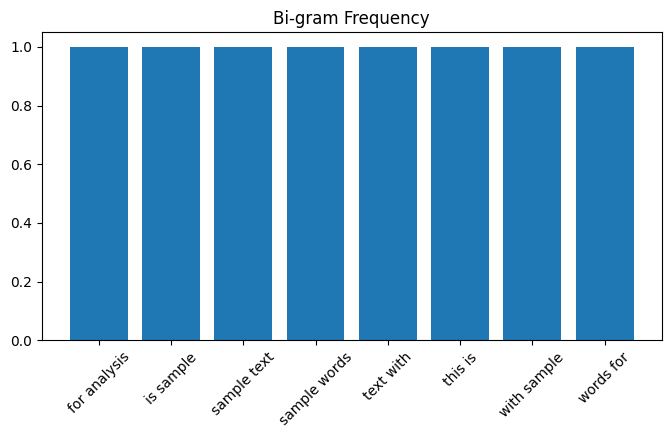

In [44]:
text = ["this is a sample text with sample words for analysis"]
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(text)

ngrams = vectorizer.get_feature_names_out()
counts = X.toarray()[0]

print(ngrams)

plt.figure(figsize=(8, 4))
plt.bar(ngrams, counts)
plt.xticks(rotation=45)
plt.title("Bi-gram Frequency")
plt.show()

**Analysis**

This bar chart shows the frequency of bi-grams (2-word sequences) extracted from a short text using `CountVectorizer` with `ngram_range=(2, 2)`.

Each bar represents a specific bi-gram and its count within the text. Bi-grams help capture contextual information that single words alone may not provide. For example, "sample text" and "text with" are meaningful phrases that reflect the structure of the original sentence.

This visualization helps identify the most common two-word combinations, which can be useful for tasks like text summarization, keyword extraction, or feature engineering in NLP pipelines.

---

Document-Level (TF-IDF)

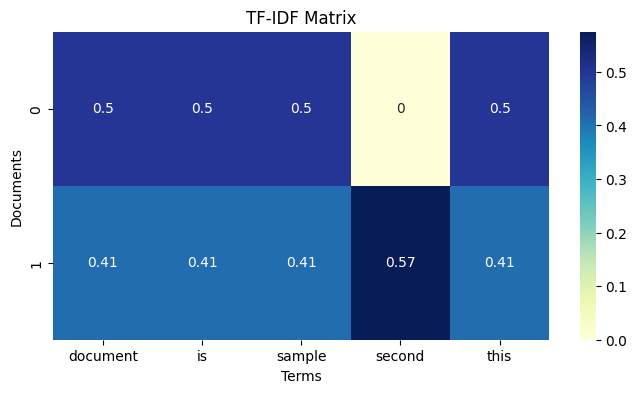

In [45]:
docs = ["this is a sample document", "this document is a second sample"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap="YlGnBu")
plt.title("TF-IDF Matrix")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()


**Analysis** 

This heatmap displays the Term Frequency–Inverse Document Frequency (TF-IDF) values for a small set of documents. TF-IDF is a statistical measure that evaluates how important a word is to a document relative to a collection (corpus).

In the matrix:
- Rows represent individual documents.
- Columns represent unique terms extracted from the corpus.
- Cell values show the TF-IDF score for each term-document pair.

Higher values indicate that a word is frequent in a document but rare across other documents, making it more informative. Words that appear in both documents (e.g., "this", "is", "sample") have lower distinguishing power, while words that are unique to a document receive higher TF-IDF scores.

This visualization helps identify which words are most significant in each document.

---

Embeddings

Number of words 9
Original embedding dimension: 300
Reduced embedding dimension: 2


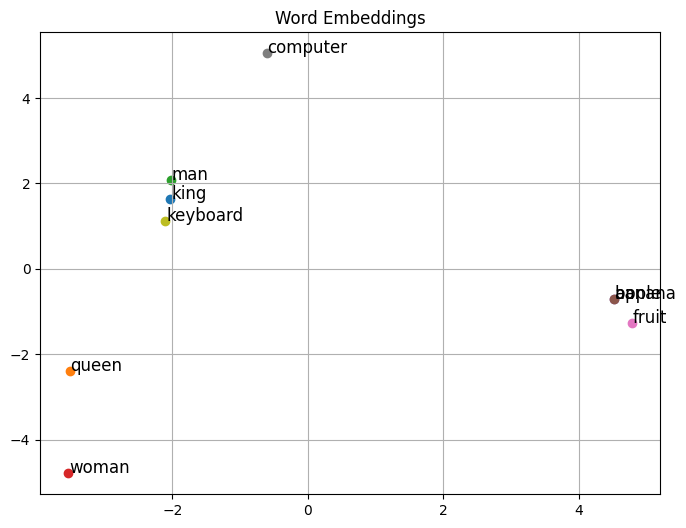

In [46]:
nlp = spacy.load("en_core_web_md")

words = ["king", "queen", "man", "woman", "apple", "banana", "fruit", "computer", "keyboard"]

vectors = [nlp(word).vector for word in words]

pca = PCA(n_components=2)
coords = pca.fit_transform(vectors)

print("Number of words", len(vectors))
print("Original embedding dimension:", len(vectors[0]))
print("Reduced embedding dimension:", coords.shape[1])

plt.figure(figsize=(8, 6))
for word, (x, y) in zip(words, coords):
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word Embeddings")
plt.grid(True)
plt.show()


**Analysis**

This 2D plot visualizes the semantic relationships between selected words using word embeddings from spaCy (`en_core_web_md`) and dimensionality reduction via PCA.

Each word is originally represented as a 300-dimensional vector that captures its contextual meaning. PCA reduces these vectors to 2 dimensions while preserving the most important variance in the data.

From the plot, we can observe that:
- Words like "king" and "queen" appear close together, reflecting their semantic similarity.
- "Apple" and "banana" form a cluster, indicating their shared category as fruits.
- "Computer" and "keyboard" are also near each other, highlighting their relatedness in the technology domain.

The spatial proximity of words in the plot reflects how similar their meanings are based on their usage in large text corpora. This provides a powerful way to explore and interpret word meaning visually.

---

Word Cloud

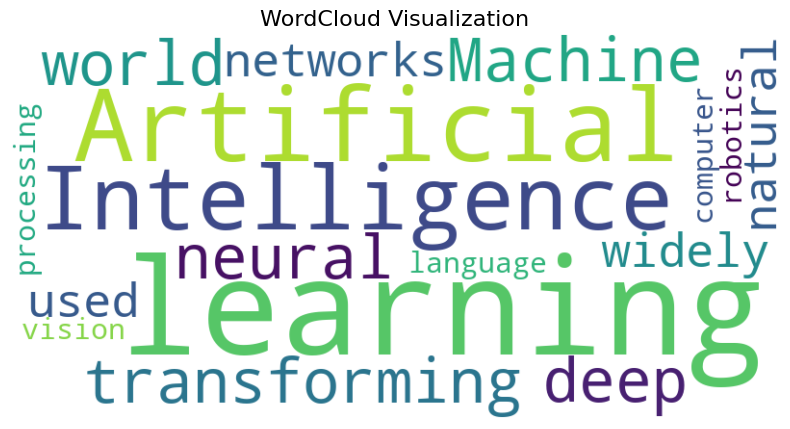

In [47]:
text_data = """
Artificial Intelligence is transforming the world. Machine learning, deep learning, and neural networks are widely used in natural language processing, computer vision, and robotics.
"""

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # hide axes
plt.title("WordCloud Visualization", fontsize=16)
plt.show()